<a href="https://colab.research.google.com/github/DSNortsev/CSE590-PythonAndDataAnalytics/blob/main/HW3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --user -U nltk
!python -m textblob.download_corpora
!pip install textatistic
!pip install -U spacy
!python -m spacy download en_core_web_lg

Requirement already up-to-date: nltk in /root/.local/lib/python3.7/site-packages (3.5)
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.
Requirement already up-to-date: spacy in /usr/local/lib/python3.7/dist-packages (3.0.5)
2021-03-23 01:34:08.119146: I tensorflow/str

In [ ]:
# Import Libraries
import imageio
import pandas as pd
import re
import nltk
import spacy
from wordcloud import WordCloud
from textblob import TextBlob, Word
from pathlib import Path
from operator import itemgetter
from nltk.corpus import stopwords
from textatistic import Textatistic
import matplotlib.pyplot as plt
nltk.download('stopwords')
%matplotlib inline
%precision 3

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'%.3f'

# **Part 1:**

## Select and download three texts of your choosing that satisfy the following criteria:th i. All texts should have the same media format (ex: 3 novels, 3 movie scripts, 3 news articles, etc.) ii. One of the three texts should have a conceptual discrepancy from the others. In a nutshell, a conceptual discrepancy between works is a key feature or characteristic that distinguishes otherwise similar entities. I am highly flexible as to what defines a discrepancy from one document to the next, but feel free to reach out if you are unsure. Some examples are below:

## a. Two non-fiction novels and one fiction novel

## **b. Two romantic comedy scripts and one horror script**

## c. Two sports news articles and one current events article
Make sure you briefly descibe your documents and cite the conceptual discrepancy that you have chosen in a paragraph

In [ ]:
# Import horror script
blob_horror = TextBlob(Path('the_turn_of_the_screw.txt').read_text())
# Import comedy script
blob_comedy1 = TextBlob(Path('love_for_love.txt').read_text())
# Import comedy script
blob_comedy2 = TextBlob(Path('much_ado_about_nothing.txt').read_text())

In [ ]:
print(f'Total number of words in the sctips:',
      f'Horror:  {len(blob_horror.words)}',
      f'Comedy1: {len(blob_comedy1.words)}',
      f'Comedy2: {len(blob_comedy2.words)}', sep='\n')

Total number of words in the sctips:
Horror:  48591
Comedy1: 37873
Comedy2: 26732


# **Part 2:**

## (a) Compute word counts for each of your documents after excluding English stop words (and optionally, performing lemmatization).


In [ ]:
stops = stopwords.words('english')
print(stops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def exclude_stop_words(txt_blob):
  regexp = re.compile('[^a-zA-Z-]+')
  usable_words = {}
  stops = stopwords.words('english')
  count = 0
  for item in txt_blob.word_counts.items():
    if regexp.search(item[0]):
      continue

    lemmatized_word = Word(item[0].lower()).lemmatize()
    if lemmatized_word not in stops:
      if lemmatized_word not in usable_words:
        usable_words[lemmatized_word] = item[1]
      else:
        # print(f'{lemmatized_word} = {usable_words[lemmatized_word]} + {item[1]}')
        usable_words[lemmatized_word] = usable_words[lemmatized_word] + item[1]    
  return usable_words

In [ ]:
usable_words_horror = exclude_stop_words(blob_horror).items()
usable_words_comedy1 = exclude_stop_words(blob_comedy1).items()
usable_words_comedy2 = exclude_stop_words(blob_comedy2).items()

In [ ]:
print(f'Total number of words after removing special characters,stopwords and lemmatization :',
      f'Horror:  {sum([item[1] for item in usable_words_horror])}',
      f'Comedy1: {sum([item[1] for item in usable_words_comedy1])}',
      f'Comedy2: {sum([item[1] for item in usable_words_comedy2])}', sep='\n')

Total number of words after removing special characters,stopwords and lemmatization :
Horror:  19890
Comedy1: 17745
Comedy2: 12880


## (b) Create and display a bar plot for each document that include word counts for the 25 most frequent words (after the above processing).

In [ ]:
sorted_horror_words =sorted(usable_words_horror, key=itemgetter(1), reverse=True)
sorted_comedy1_words =sorted(usable_words_comedy1, key=itemgetter(1), reverse=True)
sorted_comedy2_words =sorted(usable_words_comedy2, key=itemgetter(1), reverse=True)

In [ ]:
def plot_bar(words, title, most_common_count=25):
  """ Plot most common words"""
  df = pd.DataFrame(words[:most_common_count], columns=['word', 'count'])
  df.plot.bar(x='word', y='count', legend=False, title=title)
  plt.gcf().tight_layout()

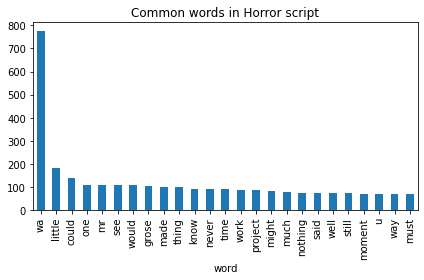

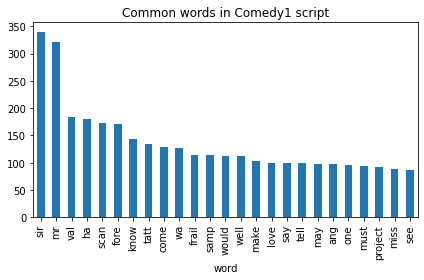

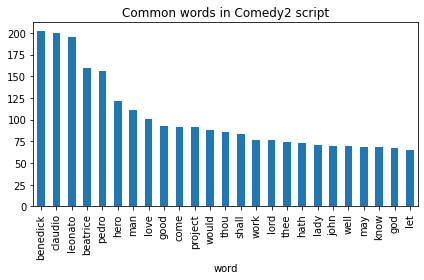

In [ ]:
plot_bar(sorted_horror_words, 'Common words in Horror script')
plot_bar(sorted_comedy1_words, 'Common words in Comedy1 script')
plot_bar(sorted_comedy2_words, 'Common words in Comedy2 script')

## (c) Create and display a word cloud for each document (using a mask image of your choice) that includes only the 100 most frequent words. Note that you'll likely want to use the approach outlined in Session 25 that utilizes the fitwords method, since you will want data consistent with those for part (b).

In [ ]:
def generate_wc(words,mask_image, file_name, max_count=100):
  # Import mask image for word cloud
  mask_image = imageio.imread(mask_image)
  wordcloud = WordCloud(width=1000, height=1000,
                      colormap='prism', mask=mask_image, background_color='white')
  wc = wordcloud.fit_words({item[0]:item[1] for item in words[:max_count]})
  wc.to_file(file_name)
  plt.figure(figsize=(10,10))
  plt.axis("off")
  plt.imshow(wc, cmap=plt.cm.gray)

Common words in Horror script


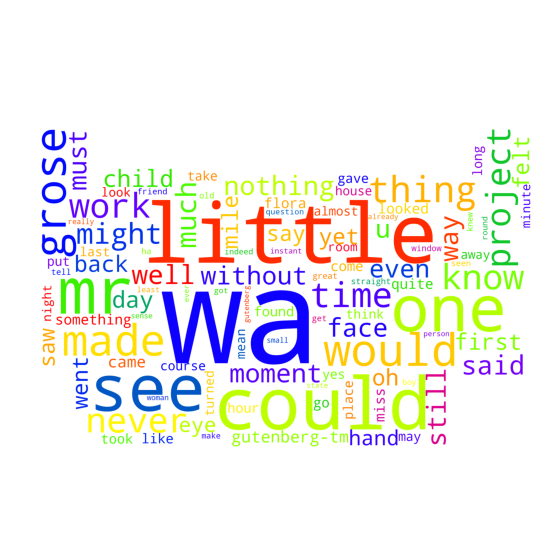

In [ ]:
print('Common words in Horror script')
generate_wc(sorted_horror_words, 'mask_background.png', 'horrow_wc.png')

Common words in Comedy1 script


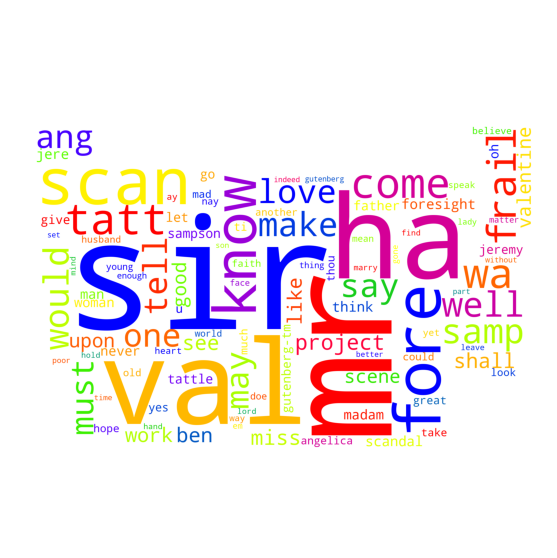

In [ ]:
print('Common words in Comedy1 script')
generate_wc(sorted_comedy1_words, 'mask_background.png', 'comedy1_wc.png')

Common words in Comedy2 script


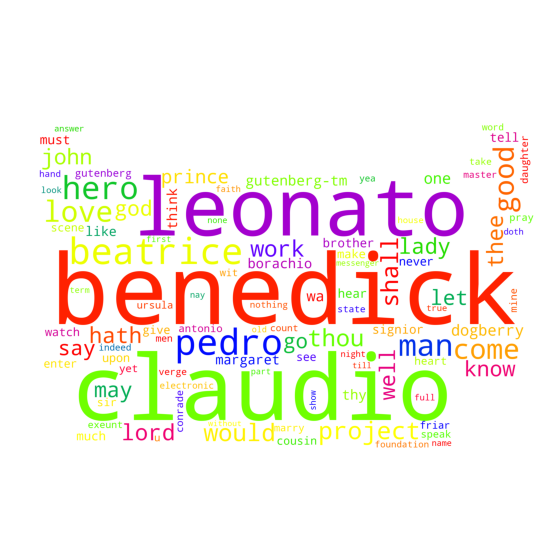

In [ ]:
print('Common words in Comedy2 script')
generate_wc(sorted_comedy2_words, 'mask_background.png', 'comedy2_wc.png')

## (d) Do you notice any difference between the document with a conceptual discrepancy relative to the others wrt (b) and/or (c) above? Try to explain why or why not.

In the horror script, we can notice words such as night, never, moment, last, instant, almost and so on. That can indicate that somthing unpleasent  and upredictable happaned in the book. 

In contrast, the comedy scripts indicates more positive or sad sentiments. We can see  the most common words words such as love, make, believe, marry, good, Lord, faith,heart.  

# **Part 3:**

## (a) Use Textatistic to compute the average of the Flesch–Kincaid, Gunning Fog, SMOG, and Dale–Chall scores for each document.


In [ ]:
readability_horrow = Textatistic(Path('7_days_to_live.txt').read_text())
print('Horror script',
      f'Flesch-Kincaid score: {readability_horrow.fleschkincaid_score:.3f}',
      f'Gunning Fog index value: {readability_horrow.gunningfog_score:.3f}',
      f'SMOG score: {readability_horrow.smog_score:.3f}',
      f'Dale Chall score: {readability_horrow.dalechall_score:.3f}', sep="\n")

Horror script
Flesch-Kincaid score: 1.224
Gunning Fog index value: 3.816
SMOG score: 5.702
Dale Chall score: 6.834


In [ ]:
readability_comedy1 = Textatistic(Path('pygmalion.txt').read_text())
print('Horror script',
      f'Flesch-Kincaid score: {readability_comedy1.fleschkincaid_score:.3f}',
      f'Gunning Fog index value: {readability_comedy1.gunningfog_score:.3f}',
      f'SMOG score: {readability_comedy1.smog_score:.3f}',
      f'Dale Chall score: {readability_comedy1.dalechall_score:.3f}', sep="\n")

Horror script
Flesch-Kincaid score: 1.991
Gunning Fog index value: 4.748
SMOG score: 6.433
Dale Chall score: 6.894


In [ ]:
readability_comedy2 = Textatistic(Path('sleepless_in_seattle.txt').read_text())
print('Horror script',
      f'Flesch-Kincaid score: {readability_comedy2.fleschkincaid_score:.3f}',
      f'Gunning Fog index value: {readability_comedy2.gunningfog_score:.3f}',
      f'SMOG score: {readability_comedy2.smog_score:.3f}',
      f'Dale Chall score: {readability_comedy2.dalechall_score:.3f}', sep="\n")

Horror script
Flesch-Kincaid score: 1.806
Gunning Fog index value: 4.150
SMOG score: 5.889
Dale Chall score: 7.456


## (b) Are there noticeable differences among your documents's readability scores, and do you suspect any difference is present (or should be present) based on your chosen conceptual discrepancy?

The main difference we can observe is that the horrow script has lower scores compare to other two comedy scripts. We can conclude that horror script can be easier understood by young or lower educated level audience. Which probably is expected since all people more likely to have fears or phobias. 

# **Part 4:**

## (a) Use spaCy to compute the pairwise similarity between your documents (i.e. doc. 1 to doc. 2, doc. 1 to doc. 3, doc. 2 to doc. 3).


In [ ]:
nlp_lg = spacy.load('en_core_web_lg')
document_horrow = nlp_lg(Path('the_turn_of_the_screw.txt').read_text())
document_comedy1 = nlp_lg(Path('love_for_love.txt').read_text())
document_comedy2 = nlp_lg(Path('much_ado_about_nothing.txt').read_text())

In [ ]:
docsim_horror_comedy1 = document_horrow.similarity(document_comedy1)
docsim_horror_comedy2 = document_horrow.similarity(document_comedy2)
docsim_comedy1_comedy2 = document_comedy1.similarity(document_comedy2)

In [ ]:
print('Pairwise similarity',
      f'Horror and Comedy1: {docsim_horror_comedy1:.3f}',
      f'Horror and Comedy2: {docsim_horror_comedy2:.3f}',
      f'Comedy1 and Comedy2: {docsim_comedy1_comedy2:.3f}', sep='\n')

Pairwise similarity
Horror and Comedy1: 0.987
Horror and Comedy2: 0.987
Comedy1 and Comedy2: 0.998


## (b) Based on these similarity measures, is your document with the conceptual disparity comparatively similar to or different from the others? Is this an expected result or not?

Based on the comparison above al three scripts with the conceptual disparity is very similar, which I did not expect. It might be explained that all sctipts have simmilar structure. 

# **Part 5:**

## (a) Use spaCy to find the named entities in your documents.


In [ ]:
horrow_entites = [(entity.text, entity.label_) for entity in document_horrow.ents]
comedy1_entites = [(entity.text, entity.label_) for entity in document_comedy1.ents]
comedy2_entites = [(entity.text, entity.label_) for entity in document_comedy2.ents]

## (b) Produce a bar plot for each document that includes the count for the 20 most common named entities (by name).


In [ ]:
def plot_bar(entities, title, most_common_count=20):
  """ Plot most common entities"""
  df = pd.DataFrame(entities[:most_common_count], columns=['word', 'count'])
  df.plot.bar(x='word', y='count', legend=False, title=title)
  plt.gcf().tight_layout()

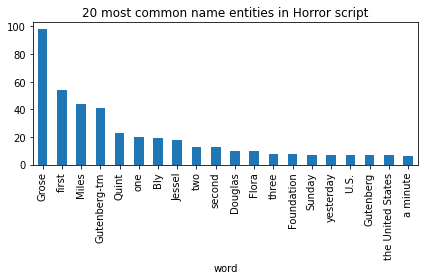

In [ ]:
horrow_entities_count = sorted(dict(Counter(entity[0] for entity in horrow_entites)).items(), key=itemgetter(1), reverse=True)
plot_bar(horrow_entities_count, '20 most common name entities in Horror script')

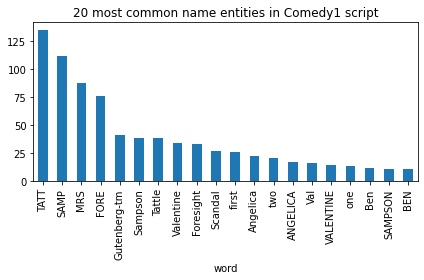

In [ ]:
comedy1_entities_count = sorted(dict(Counter(entity[0] for entity in comedy1_entites)).items(), key=itemgetter(1), reverse=True)
plot_bar(comedy1_entities_count, '20 most common name entities in Comedy1 script')

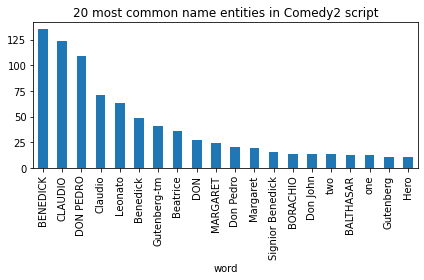

In [ ]:
comedy2_entities_count = sorted(dict(Counter(entity[0] for entity in comedy2_entites)).items(), key=itemgetter(1), reverse=True)
plot_bar(comedy2_entities_count, '20 most common name entities in Comedy2 script')

## (c) Produce a second bar plot per document based on the counts of every named entity type (PERSON, ORG, etc.)

In [ ]:
def plot_bar(entities, title):
  """ Plot most common words"""
  df = pd.DataFrame(entities, columns=['entity_type', 'count'])
  df.plot.bar(x='entity_type', y='count', legend=False, title=title)
  plt.gcf().tight_layout()

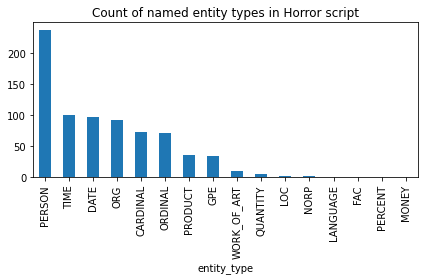

In [ ]:
horrow_type_count = sorted(dict(Counter(entity[1] for entity in horrow_entites)).items(), key=itemgetter(1), reverse=True)
plot_bar(horrow_type_count, 'Count of named entity types in Horror script')

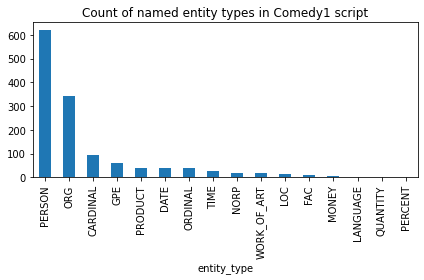

In [ ]:
comedy1_type_count = sorted(dict(Counter(entity[1] for entity in comedy1_entites)).items(), key=itemgetter(1), reverse=True)
plot_bar(comedy1_type_count, 'Count of named entity types in Comedy1 script')

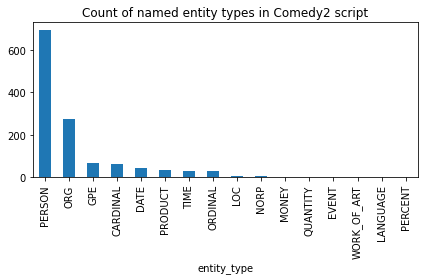

In [ ]:
comedy2_type_count = sorted(dict(Counter(entity[1] for entity in comedy2_entites)).items(), key=itemgetter(1), reverse=True)
plot_bar(comedy2_type_count, 'Count of named entity types in Comedy2 script')

## (d) Do you notice any meaningful differences (or similarities) among the documents wrt to these plots? If so, explain what they are.

One of the main differences in named entities between horror script and comedy scripts are:

1.   Horror script has higher count of Time, Date named entities that could indicate that many scences are occured during different times and days. 
2.   Comedy scripts have high count of Person, Orginization entities, that would indicate that many people and organizations/companies are involved in the scenes. 

